In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("exported_data_with_groups.csv")

# Convert numeric columns to appropriate data types
numeric_columns = ['2011', '2012', '2013(Jan-Mar)']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Calculate the total exported goods value for each group and each year
grouped_df = df.groupby('Group').sum().reset_index()


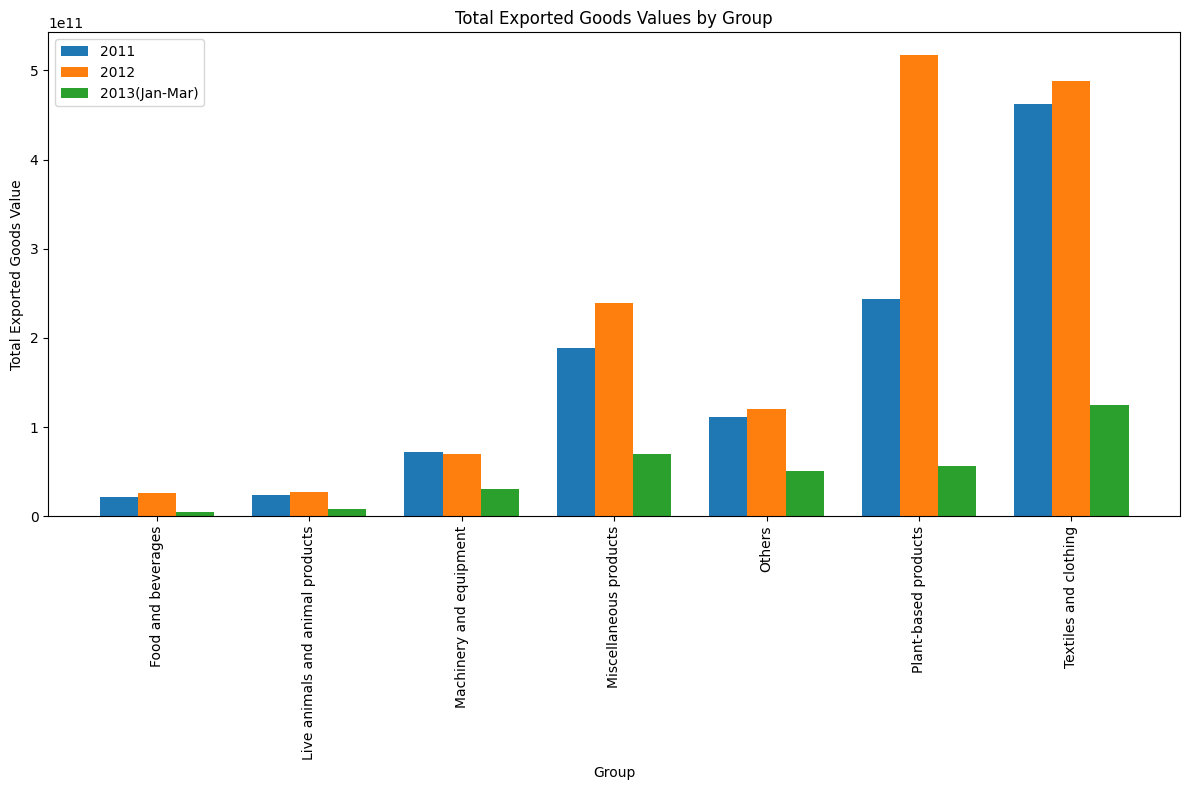

In [12]:
# Plotting
plt.figure(figsize=(12, 8))

bar_width = 0.25
index = np.arange(len(grouped_df))
years = ['2011', '2012', '2013(Jan-Mar)']

for i, year in enumerate(years):
    plt.bar(index + i * bar_width, grouped_df[year], bar_width, label=year)

plt.xlabel('Group')
plt.ylabel('Total Exported Goods Value')
plt.title('Total Exported Goods Values by Group')
plt.xticks(index + bar_width, grouped_df['Group'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


## Descriptive Analysis:


Summary Statistics:
         Chapter          2011          2012  2013(Jan-Mar)
count  97.000000  9.700000e+01  9.700000e+01   9.700000e+01
mean   49.226804  1.157008e+10  1.534222e+10   3.560728e+09
std    28.460318  3.827189e+10  5.883290e+10   1.073687e+10
min     1.000000  3.076000e+03  1.300000e+04   1.914000e+03
25%    25.000000  2.598661e+08  2.581699e+08   8.603893e+07
50%    49.000000  1.636592e+09  1.819403e+09   4.693447e+08
75%    73.000000  4.680619e+09  4.820614e+09   1.478913e+09
max    99.000000  2.329000e+11  4.697390e+11   6.361214e+10


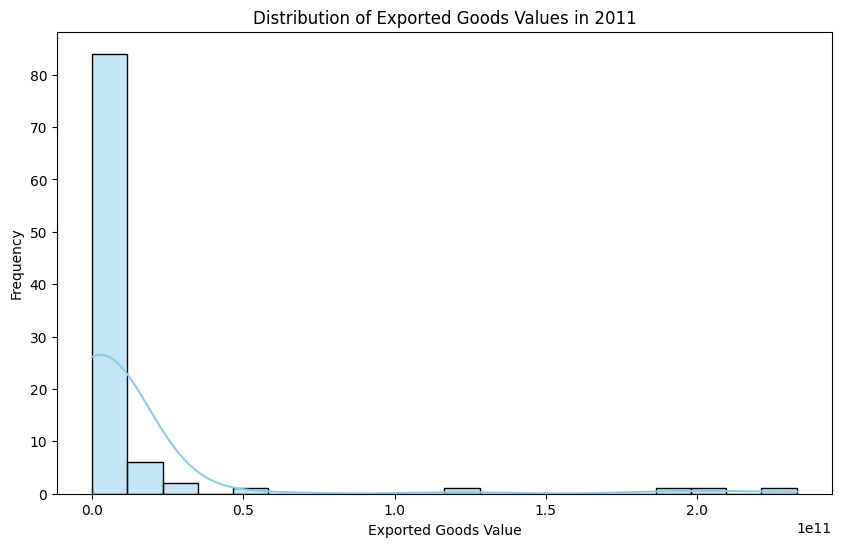

In [13]:
# Summary statistics
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)

# Distribution of exported goods values
plt.figure(figsize=(10, 6))
sns.histplot(df['2011'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Exported Goods Values in 2011")
plt.xlabel("Exported Goods Value")
plt.ylabel("Frequency")
plt.show()

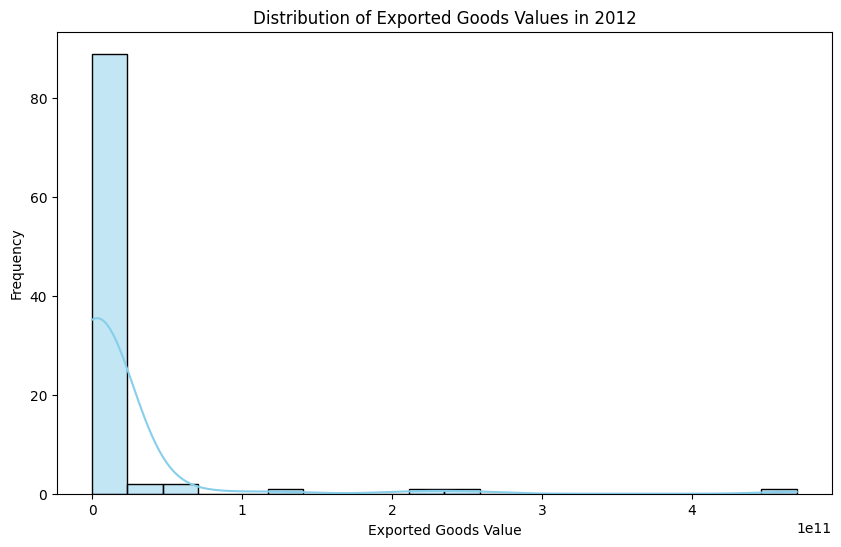

In [14]:
# Distribution of exported goods values
plt.figure(figsize=(10, 6))
sns.histplot(df['2012'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Exported Goods Values in 2012")
plt.xlabel("Exported Goods Value")
plt.ylabel("Frequency")
plt.show()

## Diagnostic Analysis:

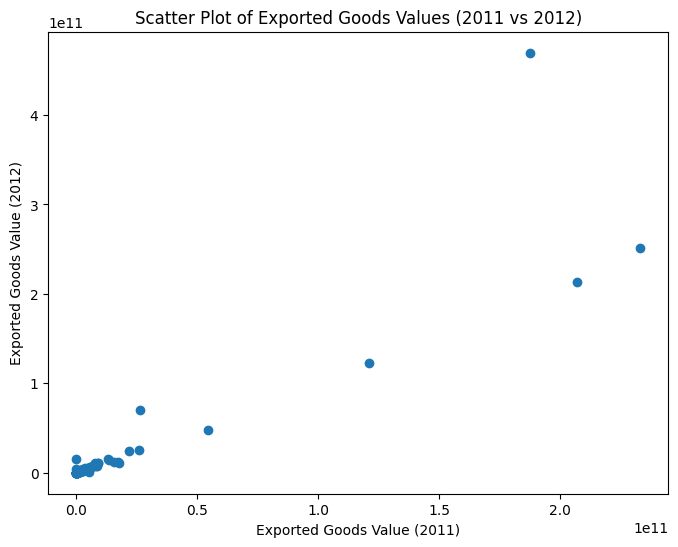

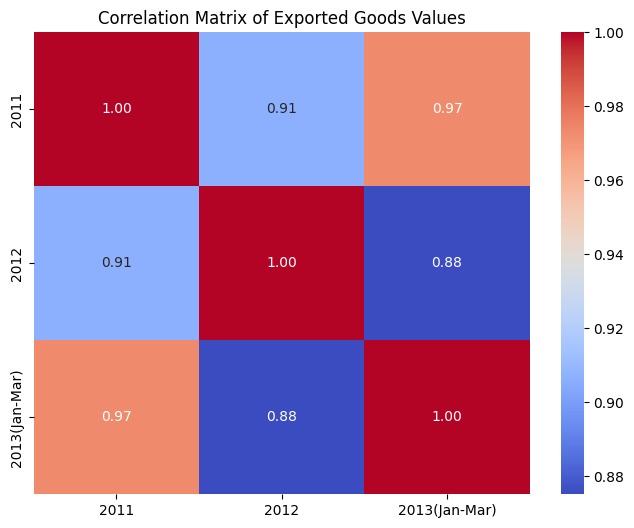

In [15]:
# Scatter plot to identify relationships between '2011' and '2012'
plt.figure(figsize=(8, 6))
plt.scatter(df['2011'], df['2012'])
plt.title("Scatter Plot of Exported Goods Values (2011 vs 2012)")
plt.xlabel("Exported Goods Value (2011)")
plt.ylabel("Exported Goods Value (2012)")
plt.show()

# Correlation matrix
corr_matrix = df[['2011', '2012', '2013(Jan-Mar)']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Exported Goods Values")
plt.show()

## Predictive Analytics

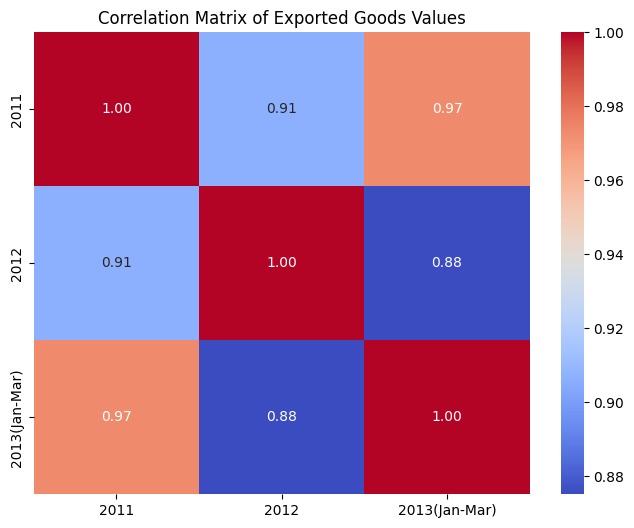


Predictive Analysis - Linear Regression Performance:
Mean Squared Error (MSE): 1.6463019429015214e+18
Coefficient of Determination (R^2): 0.22688695267135695


In [16]:
# Correlation matrix
corr_matrix = df[numeric_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Exported Goods Values")
plt.show()

# Predictive Analysis (Example: Linear Regression)
# Prepare data for modeling
X = df[['2011', '2012']]
y = df['2013(Jan-Mar)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on testing set
y_pred = model.predict(X_test)

# Evaluate model
print("\nPredictive Analysis - Linear Regression Performance:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Coefficient of Determination (R^2):", r2_score(y_test, y_pred))
